In [76]:
#SPACY SETUP
import spacy
import scispacy


nlp = spacy.load("en_core_web_sm")
doc = nlp("Apple is looking at buying U.K. startup for $1 billion")

text = """
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity. 
They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC).
"""
doc = nlp(text)

print(list(doc.sents))

# Examine the entities extracted by the mention detector.
# Note that they don't have types like in SpaCy, and they
# are more general (e.g including verbs) - these are any
# spans which might be an entity in UMLS, a large
# biomedical database.
print(doc.ents)


# We can also visualise dependency parses
# (This renders automatically inside a jupyter notebook!):
from spacy import displacy
displacy.render(next(doc.sents), style='dep', jupyter=True)



[
Myeloid derived suppressor cells (MDSC) are immature 
myeloid cells with immunosuppressive activity. 
, They accumulate in tumor-bearing mice and humans 
with different types of cancer, including hepatocellular 
carcinoma (HCC).
]
(Myeloid,)


In [77]:
#DATA SETUP
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('../Assignment_MIMIC_SQL/database.db')

# Start by uploading the DIAGNOSES_ICD from the db and getting all patients for ICD_CODE=430
query = """
SELECT * FROM DIAGNOSES_ICD
WHERE ICD9_CODE='430';
"""

# Load the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection after the query
conn.close()

# Print the first few rows of the DataFrame
print(df.head())

   ROW_ID  SUBJECT_ID  HADM_ID  SEQ_NUM ICD9_CODE
0    1683         132   160192      1.0       430
1    3275         274   130546      1.0       430
2    2438         198   131286      1.0       430
3    4007         340   139131      1.0       430
4    5023         416   148709      1.0       430


In [78]:
#Use the patient IDs to get the notes for the patients
# Connect to the SQLite database
conn = sqlite3.connect('../Assignment_MIMIC_SQL/database.db')

# Start by uploading the NOTEEVENTS from the db and getting all notes for the patients first 5 patients
query = """
SELECT * FROM NOTEEVENTS
WHERE SUBJECT_ID IN (SELECT SUBJECT_ID FROM DIAGNOSES_ICD WHERE ICD9_CODE='042')
LIMIT 5;
"""


# Load the query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection after the query
conn.close()

# Print the first few rows of the DataFrame
print(df.head())

   ROW_ID  SUBJECT_ID  HADM_ID   CHARTDATE CHARTTIME STORETIME  \
0     225       11369   121504  2199-02-14      None      None   
1     226       11369   103786  2203-11-12      None      None   
2     233       99091   185274  2190-02-24      None      None   
3     215       11018   104650  2148-12-11      None      None   
4     216       11018   186291  2151-09-24      None      None   

            CATEGORY DESCRIPTION  CGID ISERROR  \
0  Discharge summary      Report  None    None   
1  Discharge summary      Report  None    None   
2  Discharge summary      Report  None    None   
3  Discharge summary      Report  None    None   
4  Discharge summary      Report  None    None   

                                                TEXT  
0  Admission Date:  [**2199-2-8**]     Discharge ...  
1  Admission Date:  [**2203-11-3**]              ...  
2  Admission Date:  [**2190-2-11**]              ...  
3  Admission Date:  [**2148-12-2**]              ...  
4  Admission Date:  [**2151

In [79]:
#Functions to extract tokens and entities from text using Spacy
def extract_entities(text):
    doc = nlp(text)
    return [(ent.text, ent.label_) for ent in doc.ents]

def extract_tokens(text):
    doc = nlp(text)
    return [token.text for token in doc]

# Apply the functions to the DataFrame
df['entities'] = df['TEXT'].apply(extract_entities)
df['tokens'] = df['TEXT'].apply(extract_tokens)

# Print DF entities sample
print(df['entities'].iloc[0])

# Print DF tokens sample
print(df['tokens'].iloc[0])

[('2199-2-8', 'DATE'), ('2199-2-14', 'DATE'), ('Date of Birth:', 'WORK_OF_ART'), ('2161-11-27', 'DATE'), ('2212', 'DATE'), ('37-year-old', 'DATE'), ('four inch', 'QUANTITY'), ('120', 'CARDINAL'), ('120', 'CARDINAL'), ('about 1.5 inches', 'QUANTITY'), ('1', 'CARDINAL'), ('21 years', 'DATE'), ('2', 'CARDINAL'), ('3', 'CARDINAL'), ('4', 'CARDINAL'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('1', 'CARDINAL'), ('2', 'CARDINAL'), ('Ziagen', 'ORG'), ('3', 'CARDINAL'), ('Bactrim Double Strength', 'PERSON'), ('4', 'CARDINAL'), ('Lasix', 'PERSON'), ('5', 'CARDINAL'), ('6', 'CARDINAL'), ('7', 'CARDINAL'), ('Prilosec', 'PERSON'), ('8', 'CARDINAL'), ('9', 'CARDINAL'), ('Aldactone', 'ORG'), ('10', 'CARDINAL'), ('11', 'CARDINAL'), ('12', 'CARDINAL'), ('Thiamine', 'ORG'), ('97.3', 'CARDINAL'), ('116', 'CARDINAL'), ('140', 'CARDINAL'), ('16', 'CARDINAL'), ('100%', 'PERCENT'), ('three', 'CARDINAL'), ('GCS', 'ORG'), ('15', 'CARDINAL'), ('Normocephalic', 'ORG'), ('Cardiac', 'ORG'), ('1.5', 'CARDINAL'), ('Non

[['2199-2-8', '2199-2-14', 'Date of Birth:', '2161-11-27', '2212', '37-year-old', 'four inch', '120', '120', 'about 1.5 inches', '1', '21 years', '2', '3', '4', '5', '6', '1', '2', 'Ziagen', '3', 'Bactrim Double Strength', '4', 'Lasix', '5', '6', '7', 'Prilosec', '8', '9', 'Aldactone', '10', '11', '12', 'Thiamine', '97.3', '116', '140', '16', '100%', 'three', 'GCS', '15', 'Normocephalic', 'Cardiac', '1.5', 'Nontender', 'Chemistries', '1.2', '7.39/49/341/31/4', '2.5', '107', '171', '15.8', '36.1', 'INR', '1.7', '5.1', '34.4', 'Urine', 'subclavian', 'approximately 1,000', '2199-2-8', 'SICU', '4', '4', 'FFP', '1', '2199-2-10', 'SICU', 'three', '2199-2-11', 'four', 'The Pain Service', 'Klonopin', 'MSIR', 'five', 'six', 'Klonopin', 'MSIR', 'Physical Therapy', 'Case Management', 'VNA\nServices', 'Trauma Clinic', 'DISCHARGE', 'the Trauma Clinic', 'First', '2213', 'M.D.', '2214', '2215', '2199-2-13', '2199-2-17', '2216'], ['2203-11-3', '2203-11-12', 'Date of Birth:  ', '2161-11-27', 'Penicilli

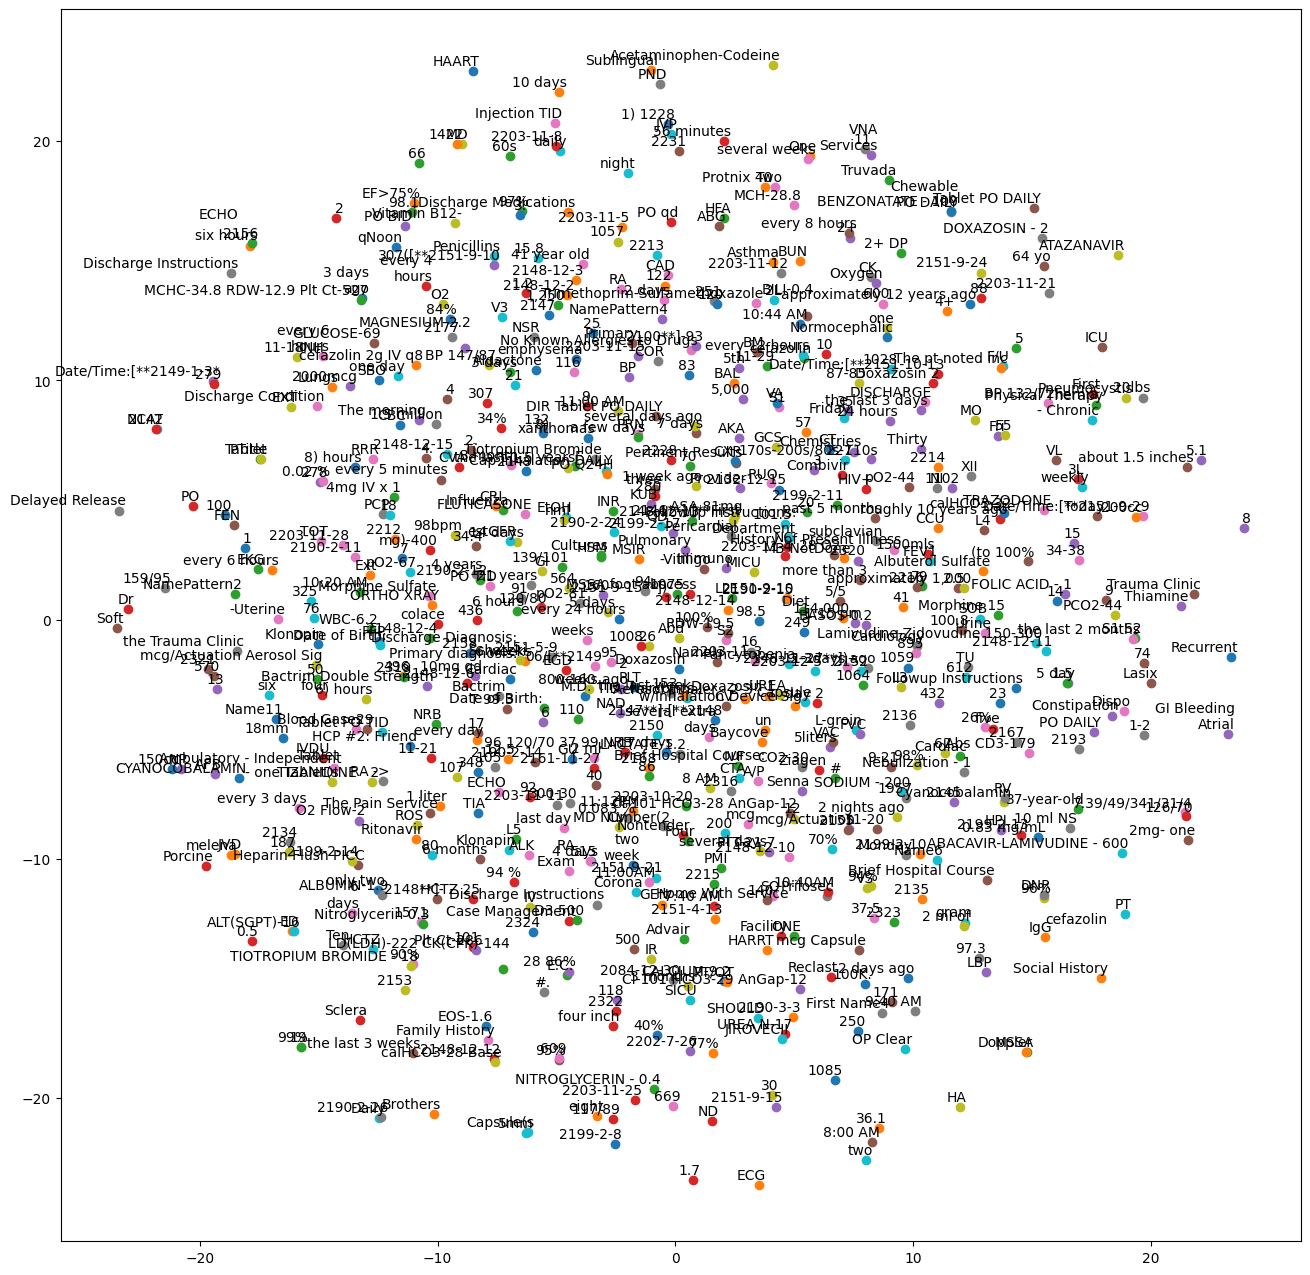

In [80]:
# Initialize an empty list to store the corpus
corpus = []

# Iterate over each row in the DataFrame
for row in range(0, len(df)):
    str_tokens = []  # Initialize an empty list to store tokens for the current row
    tokens = nlp(df['TEXT'].iloc[row]).ents  # Extract named entities from the text using Spacy
    for i in range(0, len(tokens)):
        str_tokens.append(tokens[i].text)  # Append each token's text to the list
    corpus.append(list(str_tokens))  # Append the list of tokens to the corpus

# Print the corpus to verify the extracted tokens
print(corpus)

# Import the word2vec model from gensim
from gensim.models import word2vec

# Create a Word2Vec model using the corpus
model = word2vec.Word2Vec(corpus, min_count=1)

# Import necessary libraries for data manipulation and visualization
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Define a function to create and plot a TSNE model
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    # Extract tokens and labels from the Word2Vec model
    for word in model.wv.index_to_key:
        tokens.append(model.wv[word])
        labels.append(word)

    # Convert the list of tokens to a numpy array
    tokens = np.array(tokens)
    
    # Create a TSNE model and fit-transform the tokens
    tsne_model = TSNE(perplexity=30, early_exaggeration=12, n_components=2, init='pca', n_iter=1000, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    # Separate the transformed values into x and y coordinates
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    # Plot the TSNE results
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

# Call the tsne_plot function with the Word2Vec model
tsne_plot(model)

# Use displacy to visualize the entities in the first note
displacy.render(nlp(df['TEXT'].iloc[0]), style='ent', jupyter=True)
